In [1]:
from skimage.io import imread
from pathlib import Path
import cellpose
from cellpose import models 

parent_path = r'D:\images\tnia-python-images\imagesc\2025_05_21_3D_Cellpose_MB'
image_name = '1860_M0_DAPI_001_Sub_crop_BG-Denoised.tif'
label_name_cpsam = '1860_M0_DAPI_001_Sub_crop_BG-Denoised_cp_masks.tif'

image = imread(Path(parent_path) / image_name)
label_cpsam = imread(Path(parent_path) / label_name_cpsam)

print(image.shape)

(20, 673, 673)


In [2]:
major_number = cellpose.version.split('.')[0]
print(f"Cellpose version: {cellpose.version} (major number: {major_number})")

if major_number == '3':
    model = models.Cellpose(gpu=True, model_type='cyto2')
elif major_number == '4':
    model = models.CellposeModel(gpu=True)


Cellpose version: 3.1.0 (major number: 3)


In [5]:
test = model.eval(image, do_3D=True, z_axis=0, diameter=100)

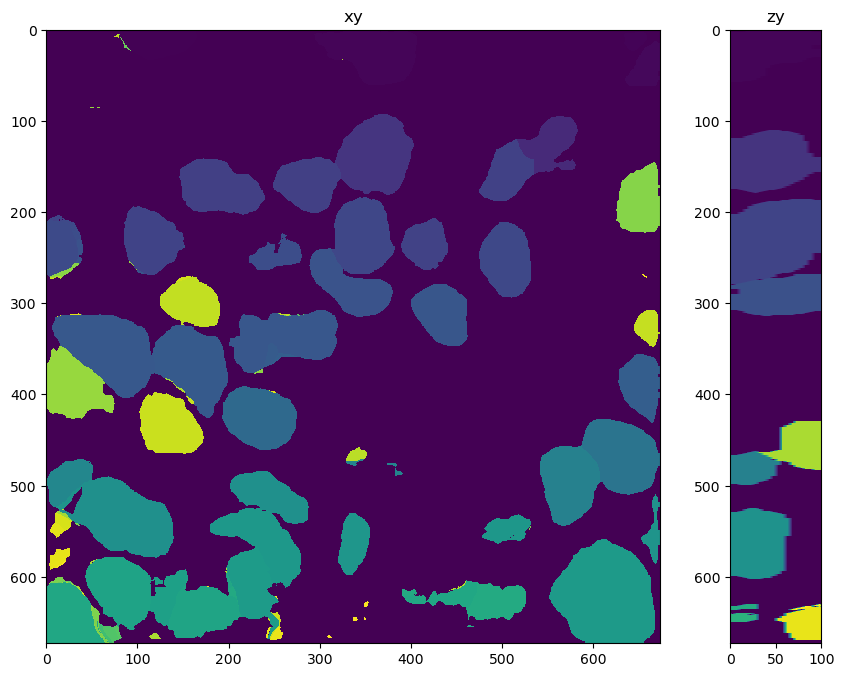

In [6]:
from tnia.plotting.projections import show_xy_zy_slice_center

fig = show_xy_zy_slice_center(test[0], sxy=1, sz=5, figsize=(10,10))

In [ ]:
help(model.eval)

Help on method eval in module cellpose.models:

eval(x, batch_size=8, resample=None, channels=None, channel_axis=None, z_axis=None, normalize=True, invert=False, rescale=None, diameter=None, flow_threshold=0.4, cellprob_threshold=0.0, do_3D=False, anisotropy=None, flow3D_smooth=0, stitch_threshold=0.0, min_size=15, max_size_fraction=0.4, niter=None, augment=False, tile_overlap=0.1, bsize=256, compute_masks=True, progress=None) method of cellpose.models.CellposeModel instance
    segment list of images x, or 4D array - Z x 3 x Y x X
    
    Args:
        x (list, np.ndarry): can be list of 2D/3D/4D images, or array of 2D/3D/4D images. Images must have 3 channels.
        batch_size (int, optional): number of 256x256 patches to run simultaneously on the GPU
            (can make smaller or bigger depending on GPU memory usage). Defaults to 64.
        resample (bool, optional): run dynamics at original image size (will be slower but create more accurate boundaries). 
            depreca